In [1]:


from arcgis.gis import GIS
from arcgis.geoenrichment import *
import arcgis.features

In [2]:
gis = GIS("http://slustl.maps.arcgis.com/home", "sspiegel_slu","Apples*200")

In [3]:


usa  =  Country.get('US')
type(usa)



arcgis.geoenrichment.enrichment.Country

In [4]:
usa.properties.datasets

['USA_ESRI_2018', 'USA_ASR_2018', 'USA_RMP_2018', 'USA_ACS_2018', 'Landscape']

In [5]:
usa.properties.name

'United States'

In [6]:
%config IPCompleter.greedy=True

In [7]:
usa.subgeographies.states

{'Alabama': <NamedArea name:"Alabama" area_id="01", level="US.States", country="United States">,
 'Alaska': <NamedArea name:"Alaska" area_id="02", level="US.States", country="United States">,
 'Arizona': <NamedArea name:"Arizona" area_id="04", level="US.States", country="United States">,
 'Arkansas': <NamedArea name:"Arkansas" area_id="05", level="US.States", country="United States">,
 'California': <NamedArea name:"California" area_id="06", level="US.States", country="United States">,
 'Colorado': <NamedArea name:"Colorado" area_id="08", level="US.States", country="United States">,
 'Connecticut': <NamedArea name:"Connecticut" area_id="09", level="US.States", country="United States">,
 'Delaware': <NamedArea name:"Delaware" area_id="10", level="US.States", country="United States">,
 'District_of_Columbia': <NamedArea name:"District of Columbia" area_id="11", level="US.States", country="United States">,
 'Florida': <NamedArea name:"Florida" area_id="12", level="US.States", country="Uni

In [8]:


usa.subgeographies.states['Missouri'].geometry



{'rings': [[[-91.6863600003003, 40.580880000476725],
   [-91.68869999997764, 40.55739000007476],
   [-91.62006999997018, 40.54082000031297],
   [-91.62134999967085, 40.51007000053691],
   [-91.590819999961, 40.49228999993662],
   [-91.5747500002382, 40.46566000000853],
   [-91.52508999949993, 40.457850000538954],
   [-91.52326999925181, 40.45006000020999],
   [-91.53361999986318, 40.4383200001542],
   [-91.51912999954628, 40.432820000572065],
   [-91.52460999961218, 40.410760000611695],
   [-91.49808999907684, 40.40193000074087],
   [-91.48847999941533, 40.40431999980772],
   [-91.48492999990867, 40.384269999950895],
   [-91.46354999929417, 40.3855499998609],
   [-91.46389999954918, 40.37566000011434],
   [-91.44873999995043, 40.37679999966219],
   [-91.44124000013235, 40.38626000067716],
   [-91.4194200000699, 40.37826000061613],
   [-91.44485999951034, 40.363140000293136],
   [-91.46213999906246, 40.342409999955855],
   [-91.49096999984361, 40.28336000078577],
   [-91.49052000028573,

In [9]:
usa.subgeographies.states['Missouri'].places


{'Adrian_city': <NamedArea name:"Adrian city" area_id="2900244", level="US.Places", country="United States">,
 'Advance_city': <NamedArea name:"Advance city" area_id="2900262", level="US.Places", country="United States">,
 'Affton_CDP': <NamedArea name:"Affton CDP" area_id="2900280", level="US.Places", country="United States">,
 'Agency_village': <NamedArea name:"Agency village" area_id="2900298", level="US.Places", country="United States">,
 'Airport_Drive_village': <NamedArea name:"Airport Drive village" area_id="2900424", level="US.Places", country="United States">,
 'Alba_city': <NamedArea name:"Alba city" area_id="2900496", level="US.Places", country="United States">,
 'Albany_city': <NamedArea name:"Albany city" area_id="2900514", level="US.Places", country="United States">,
 'Aldrich_village': <NamedArea name:"Aldrich village" area_id="2900568", level="US.Places", country="United States">,
 'Alexandria_city': <NamedArea name:"Alexandria city" area_id="2900604", level="US.Places"

In [21]:
st_louis = usa.subgeographies.states['Missouri'].places['St._Louis_city'].geometry

In [22]:
map1 = gis.map('St. Louis')
map1.basemap = 'topo'

In [23]:
map1.draw(st_louis)

In [24]:
map1

MapView(layout=Layout(height='400px', width='100%'))

In [25]:
stl_df = enrich([usa.subgeographies.states['Missouri'].places['St._Louis_city']])

In [26]:
stl_df

,AVGHHSZ,HasData,ID,OBJECTID,SHAPE,StdGeographyID,StdGeographyLevel,StdGeographyName,TOTFEMALES,TOTHH,TOTMALES,TOTPOP,aggregationMethod,apportionmentConfidence,populationToPolygonSizeRating,sourceCountry
0,2.16,1,0,1,"{""rings"": [[[-90.18209700023124, 38.7741319997...",2965000,US.Places,St. Louis city,162354,140620,152917,315273,Query:US.Places,2.576,2.191,US


In [27]:
print("Total pop: "+str(stl_df['TOTPOP'][0]))

Total pop: 315273


In [4]:


search_item=gis.content.search("title:St_Louis_Crime ",item_type="Feature Service")

<Item title:"St_Louis_Crime" type:Feature Layer Collection owner:sspiegel_slu>
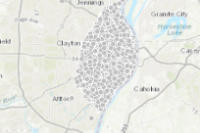

In [5]:
search_item[6]

In [6]:
layer = search_item[6]

In [7]:
density = arcgis.features.analysis.calculate_density(layer
                                          ,gis = gis)

In [15]:
density.layer

{
  "featureSet": {
    "features": [
      {
        "attributes": {
          "OBJECTID": 1,
          "class": 2,
          "Value_Min_per_SquareMile": 218.4524658203125,
          "Value_Max_per_SquareMile": 436.904931640625,
          "AnalysisArea": 0.568464390801511
        },
        "geometry": {
          "rings": [
            [
              [
                896796.2504698858,
                1048440.9394838884
              ],
              [
                896579.8459419757,
                1048470.5154567882
              ],
              [
                895815.65656358,
                1049175.6903748512
              ],
              [
                895509.2677840404,
                1049386.5231848657
              ],
              [
                895284.1139641516,
                1049465.4386695176
              ],
              [
                894857.750133168,
                1049539.6796475947
              ],
              [
                893990.5651

In [45]:
hot_spot = arcgis.features.analysis.find_hot_spots(layer)

In [46]:
hot_spot

{'hot_spots_result_layer': <FeatureCollection>,
 'process_info': ['{"messageCode": "SS_00002", "message": "The following report outlines the workflow used to optimize your Find Hot Spots result:", "params": {}, "style": "<b></b><br/>"}',
  '{"message": "Initial Data Assessment", "messageCode": "SS_84428", "params": {}, "style": "<u><b></b></u><br/>"}',
  '{"message": "There are ${NumFeatures} valid input features.", "messageCode": "SS_84485", "params": {"NumFeatures": "12083"}, "style": "<ul><li></li></ul>"}',
  '{"message": "There were ${NumOutliers} outlier locations; these will not be used to compute ${AggregationType}.", "messageCode": "SS_84434", "params": {"NumOutliers": "10", "AggregationType": "the polygon cell size"}, "style": "<ul><li></li></ul><br/>"}',
  '{"message": "Incident Aggregation", "messageCode": "SS_84444", "params": {}, "style": "<u><b></b></u><br/>"}',
  '{"message": "Using a polygon cell size of ${SnapInfo}", "messageCode": "SS_84450", "params": {"SnapInfo": "8

In [7]:
density

<FeatureCollection>

In [16]:
map2 = gis.map('St. Louis')

In [10]:
map2

MapView(layout=Layout(height='400px', width='100%'))

In [11]:
density.properties


{
  "featureSet": {
    "features": [
      {
        "attributes": {
          "OBJECTID": 1,
          "class": 2,
          "Value_Min_per_SquareMile": 218.4524658203125,
          "Value_Max_per_SquareMile": 436.904931640625,
          "AnalysisArea": 0.568464390801511
        },
        "geometry": {
          "rings": [
            [
              [
                896796.2504698858,
                1048440.9394838884
              ],
              [
                896579.8459419757,
                1048470.5154567882
              ],
              [
                895815.65656358,
                1049175.6903748512
              ],
              [
                895509.2677840404,
                1049386.5231848657
              ],
              [
                895284.1139641516,
                1049465.4386695176
              ],
              [
                894857.750133168,
                1049539.6796475947
              ],
              [
                893990.5651